In [28]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("data.csv")

In [4]:
data.describe(include="all")

,Duration,Pulse,Maxpulse,Calories
count,169.000000,169.000000,169.000000,164.000000
mean,63.846154,107.461538,134.047337,375.790244
std,42.299949,14.510259,16.450434,266.379919
min,15.000000,80.000000,100.000000,50.300000
25%,45.000000,100.000000,124.000000,250.925000
50%,60.000000,105.000000,131.000000,318.600000
75%,60.000000,111.000000,141.000000,387.600000
max,300.000000,159.000000,184.000000,1860.400000


In [5]:
data.head()

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0


In [6]:
data.tail()

,Duration,Pulse,Maxpulse,Calories
164,60,105,140,290.8
165,60,110,145,300.0
166,60,115,145,310.2
167,75,120,150,320.4
168,75,125,150,330.4


In [12]:
data.shape

(169, 4)

In [7]:
data.corr()

,Duration,Pulse,Maxpulse,Calories
Duration,1.000000,-0.155408,0.009403,0.922717
Pulse,-0.155408,1.000000,0.786535,0.025121
Maxpulse,0.009403,0.786535,1.000000,0.203813
Calories,0.922717,0.025121,0.203813,1.000000


In [9]:
data.corr().loc['Duration', 'Calories']

0.9227166783472459

In [15]:
data.isna().sum()

Duration    0
Pulse       0
Maxpulse    0
Calories    5
dtype: int64

In [21]:
data.dropna(inplace=True)

In [22]:
data.shape

(164, 4)

array([[<Axes: xlabel='Duration', ylabel='Duration'>,
        <Axes: xlabel='Pulse', ylabel='Duration'>,
        <Axes: xlabel='Maxpulse', ylabel='Duration'>,
        <Axes: xlabel='Calories', ylabel='Duration'>],
       [<Axes: xlabel='Duration', ylabel='Pulse'>,
        <Axes: xlabel='Pulse', ylabel='Pulse'>,
        <Axes: xlabel='Maxpulse', ylabel='Pulse'>,
        <Axes: xlabel='Calories', ylabel='Pulse'>],
       [<Axes: xlabel='Duration', ylabel='Maxpulse'>,
        <Axes: xlabel='Pulse', ylabel='Maxpulse'>,
        <Axes: xlabel='Maxpulse', ylabel='Maxpulse'>,
        <Axes: xlabel='Calories', ylabel='Maxpulse'>],
       [<Axes: xlabel='Duration', ylabel='Calories'>,
        <Axes: xlabel='Pulse', ylabel='Calories'>,
        <Axes: xlabel='Maxpulse', ylabel='Calories'>,
        <Axes: xlabel='Calories', ylabel='Calories'>]], dtype=object)

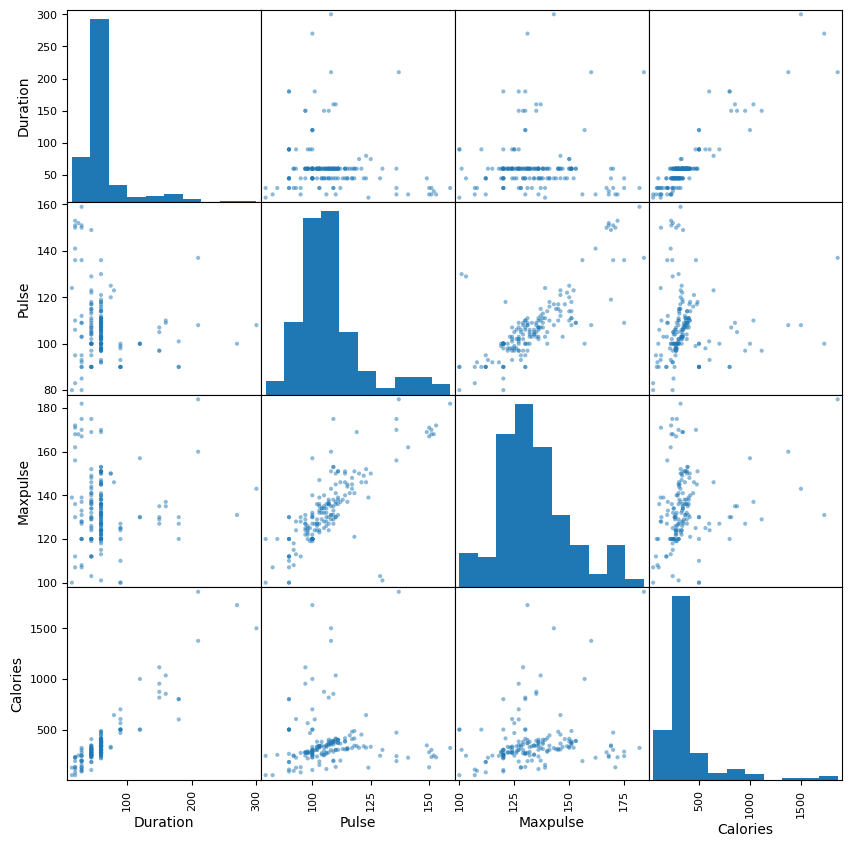

In [30]:
pd.plotting.scatter_matrix(data,figsize=[10,10])

<Axes: >

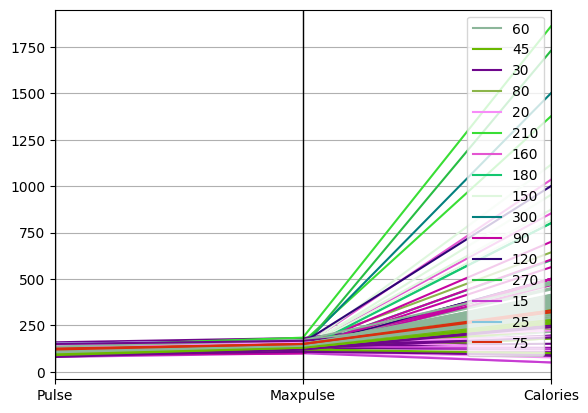

In [37]:
from pandas.plotting import parallel_coordinates
parallel_coordinates(data[['Duration', 'Pulse', 'Maxpulse', 'Calories']],'Duration')

In [33]:
pd.crosstab(data['Duration'],data['Pulse'])

Pulse,80,83,85,90,92,93,95,97,98,99,...,130,136,137,141,149,150,151,152,153,159
Duration,,,,,,,,,,,,,,,,,,,,,
15,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20,0,1,0,0,0,0,1,0,0,0,...,0,1,0,1,0,1,1,0,1,0
25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
30,1,0,1,2,1,1,1,0,0,0,...,0,1,0,0,0,1,1,0,0,1
45,0,0,0,4,0,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
60,0,0,0,0,2,1,0,4,5,1,...,1,1,0,0,0,0,0,0,0,0
75,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
80,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
90,0,0,0,4,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [35]:
Q1 = data['Maxpulse'].quantile(0.25)
Q3 = data['Maxpulse'].quantile(0.75)
IQR = Q3 - Q1
outliers =data[(data['Maxpulse'] < Q1 - 1.5 * IQR) | (data['Maxpulse'] > Q3 + 1.5 * IQR)]
outliers

,Duration,Pulse,Maxpulse,Calories
3,45,109,175,282.4
54,30,136,175,238.0
58,20,153,172,226.4
80,30,159,182,319.2
81,45,149,169,344.0
85,30,151,170,300.0
94,20,150,171,127.4
95,20,151,168,229.4
97,25,152,168,244.2
109,210,137,184,1860.4
